### TFM - Predicción de los precios de alquiler a partir de las características de las viviendas

##Selección

Está hecha con el web scraping -- fotocasa_definitivo.ipynb en este mismo repositorio

## Preprocesado

Importación de librerías necesarias para el desarrollo.


In [1]:
# Import de todo las librerías que podemos llegar a usar.
import pandas as pd
import io
from google.colab import files

import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

from scipy import cluster
import sklearn.neighbors
from sklearn import preprocessing 
from sklearn.decomposition import PCA

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import kneighbors_graph

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
%matplotlib inline


Hacemos esa primera lectura del dataset, contar, filas, columnas, tipos de datos.

In [2]:
#Lectura del dataset
pisos_bilbao = pd.read_csv('/content/Bilbao_csv.csv', ';' , encoding= 'unicode_escape', index_col=0)
pisos_bilbao.head(5)

,Habitaciones,Banhos,Superficie,Terraza,Ascensor,Parking,Tipo_vivienda,Calle,Precio,Barrio,Renta
Ciudad,,,,,,,,,,,
Bilbao,2,1,75,N,S,N,Piso,Calle Santutxu; BegoÃ±a - Santutxu,750,Santutxu,18165
Bilbao,1,1,45,N,S,N,Piso,Alda. Mazarredo; Abando - Albia,780,Abando,40300
Bilbao,4,2,220,N,S,N,Piso,Ercilla; Abando - Albia,1550,Abando,40300
Bilbao,3,2,87,N,S,N,Piso,Indautxu Kalea; Indautxu,1200,Indautxu,40401
Bilbao,1,1,45,N,S,N,Piso,Uribitarte; Abando - Albia,950,Abando,40300


In [3]:
# Se borra directamente el campo calle, ya que se solo se necesitaba para sacar el barrio 
# Ese proceso ya se ha hecho en la excel
pisos_bilbao= pisos_bilbao.drop(['Calle'], axis=1)

In [4]:
# Visualización de los 5 primeros registros del dataset.
pisos_bilbao.head(5)

,Habitaciones,Banhos,Superficie,Terraza,Ascensor,Parking,Tipo_vivienda,Precio,Barrio,Renta
Ciudad,,,,,,,,,,
Bilbao,2,1,75,N,S,N,Piso,750,Santutxu,18165
Bilbao,1,1,45,N,S,N,Piso,780,Abando,40300
Bilbao,4,2,220,N,S,N,Piso,1550,Abando,40300
Bilbao,3,2,87,N,S,N,Piso,1200,Indautxu,40401
Bilbao,1,1,45,N,S,N,Piso,950,Abando,40300


#### Estudio inicial de las características del dataset.

In [5]:
# Información de las columnas del dataset
pisos_bilbao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, Bilbao to Bilbao
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Habitaciones   564 non-null    int64 
 1   Banhos         564 non-null    int64 
 2   Superficie     564 non-null    int64 
 3   Terraza        564 non-null    object
 4   Ascensor       564 non-null    object
 5   Parking        564 non-null    object
 6   Tipo_vivienda  564 non-null    object
 7   Precio         564 non-null    int64 
 8   Barrio         564 non-null    object
 9   Renta          564 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 48.5+ KB


In [6]:
# Información de estadística descriptiva de las columnas numéricas del dataset
#pisos_bilbao.describe(include = 'all')
pisos_bilbao.describe()

,Habitaciones,Banhos,Superficie,Precio,Renta
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,2.237589,1.562057,84.723404,1120.730496,31630.363475
std,0.974053,0.623444,32.299246,384.703233,8166.649655
min,1.000000,0.000000,0.000000,0.000000,18165.000000
25%,2.000000,1.000000,65.000000,850.000000,28537.000000
50%,2.000000,2.000000,79.500000,1050.000000,30491.000000
75%,3.000000,2.000000,100.000000,1250.000000,40300.000000
max,9.000000,8.000000,340.000000,5000.000000,40401.000000


### Estudio de las características numéricas entre las que se encuentra la variable objetivo.

In [7]:
# Características del dataset
features = pisos_bilbao[['Habitaciones', 'Banhos', 'Superficie', 'Terraza', 
                 'Ascensor', 'Parking', 'Tipo_vivienda', 
                  'Precio', 'Barrio', 'Renta']]


In [8]:
# Características numéricas
atributos_numericos = features.loc[:, ( 'Precio', 'Habitaciones', 'Banhos', 'Superficie', 'Renta')]
atributos_numericos.head()

,Precio,Habitaciones,Banhos,Superficie,Renta
Ciudad,,,,,
Bilbao,750,2,1,75,18165
Bilbao,780,1,1,45,40300
Bilbao,1550,4,2,220,40300
Bilbao,1200,3,2,87,40401
Bilbao,950,1,1,45,40300


Representamos gráficamente la distribución de las Características numéricas.

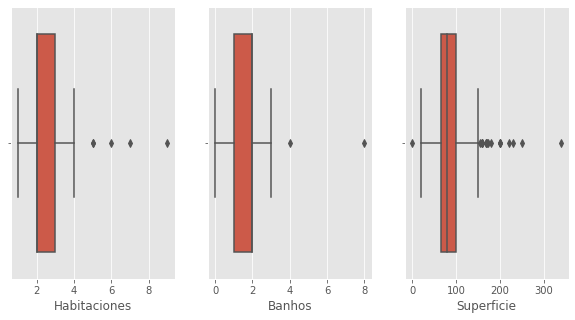

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'Habitaciones', data = pisos_bilbao)
plt.subplot(1,3,2)
sns.boxplot(x = 'Banhos',  data = pisos_bilbao)
plt.subplot(1,3,3)
sns.boxplot(x = 'Superficie',  data = pisos_bilbao)


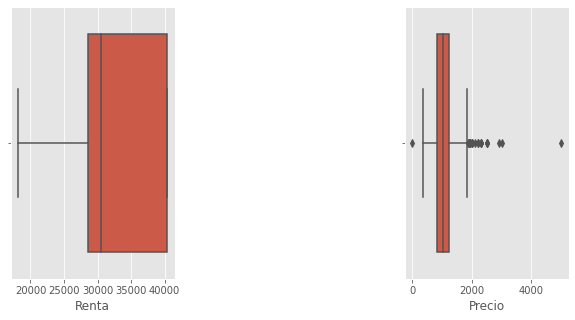

In [11]:
#Podré unificarlos
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'Renta', data = pisos_bilbao)
plt.subplot(1,3,3)
sns.boxplot(x = 'Precio',  data = pisos_bilbao)


Se representa mediante gráficas de dispersión la relación entre la variable objetivo y el resto de características numéricas.

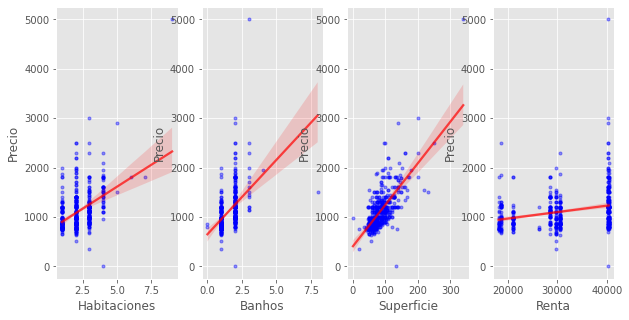

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1,4,1)
sns.regplot(x = 'Habitaciones', y='Precio', data = atributos_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})
plt.subplot(1,4,2)
sns.regplot(x = 'Banhos', y='Precio', data = atributos_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})
plt.subplot(1,4,3)
sns.regplot(x = 'Superficie', y='Precio', data = atributos_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})
plt.subplot(1,4,4)
sns.regplot(x = 'Renta', y='Precio', data = atributos_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})

In [13]:
# Correlación de las características con respecto a la variable objetivo
corr = atributos_numericos.corr()
corr.sort_values(['Precio'], ascending=False, inplace=True)
corr['Precio']

Precio          1.000000
Superficie      0.704394
Banhos          0.487449
Habitaciones    0.451415
Renta           0.276704
Name: Precio, dtype: float64

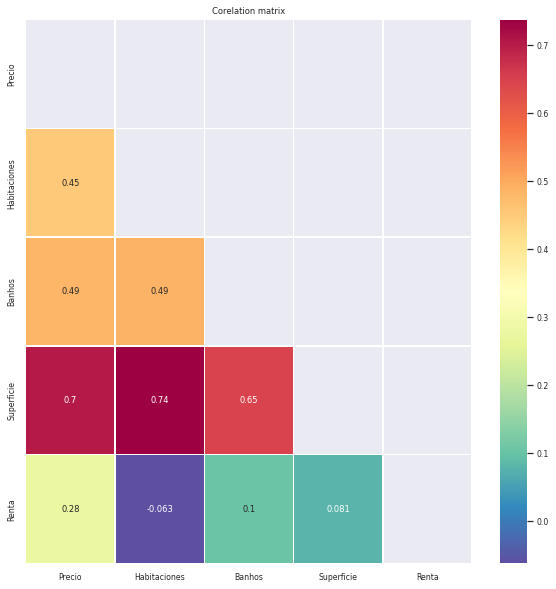

In [14]:
# Obtenemos la correlación por pares de todas las columnas
corr = atributos_numericos.corr()
# Configuramos la visualización
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.set(font_scale=0.7)
plt.figure(figsize = (10, 10))
plt.title('Corelation matrix')
sns.heatmap(corr, mask = mask, cmap = 'Spectral_r', linewidths = .5, annot=True)
plt.show()

### Estudio de las características no numéricas


Primero se estudia los valores que pueden tomar y en que proporción.

In [15]:
print(f"Valores presentes en el campo Habitaciones: {pisos_bilbao['Habitaciones'].unique()} \n")
print(f"Conteo de ocurrencias por valor:\n{pisos_bilbao['Habitaciones'].value_counts()}")

Valores presentes en el campo Habitaciones: [2 1 4 3 6 7 5 9] 

Conteo de ocurrencias por valor:
2    224
3    162
1    132
4     41
5      2
9      1
7      1
6      1
Name: Habitaciones, dtype: int64


In [16]:
print(f"Valores presentes en el campo Banhos: {pisos_bilbao['Banhos'].unique()} \n")
print(f"Conteo de ocurrencias por valor:\n{pisos_bilbao['Banhos'].value_counts()}")

Valores presentes en el campo Banhos: [1 2 3 0 4 8] 

Conteo de ocurrencias por valor:
2    281
1    265
3     14
0      2
8      1
4      1
Name: Banhos, dtype: int64


In [17]:
print(f"Valores presentes en el campos superficie: {pisos_bilbao['Superficie'].unique()} \n")
print(f"Conteo de ocurrencias por valor:\n{pisos_bilbao['Superficie'].value_counts()}")
print(f"Estadísticas del atributo: \n{pisos_bilbao['Superficie'].agg(['min', 'max', 'mean', 'std', 'median'])}")

Valores presentes en el campos superficie: [ 75  45 220  87  65  90  60 200 109 101  89  95  72 119  47 140  70  77
  74  55 105  85  50  63 115  83  80 143 125 110  78 250  62 120 126 168
 106  20 100  52  91  82  81  67 160 173 130 103  92  86  57 107  53  96
  54 156  88  48  61 139  98  97 148  94 102 108 145 170 150 136  68 112
  84  58 132  69 128  64  39 180 104  73 340 111  56  40  76  93 135  79
  46  34   0 230 133 149  71] 

Conteo de ocurrencias por valor:
65     39
70     37
60     34
50     32
75     30
       ..
250     1
84      1
81      1
79      1
0       1
Name: Superficie, Length: 97, dtype: int64
Estadísticas del atributo: 
min         0.000000
max       340.000000
mean       84.723404
std        32.299246
median     79.500000
Name: Superficie, dtype: float64


In [18]:
print(f"Conteo de ocurrencias para el campo Terraza:\n{pisos_bilbao['Terraza'].value_counts()}")

Conteo de ocurrencias para el campo Terraza:
N    467
S     97
Name: Terraza, dtype: int64


In [19]:
print(f"Conteo de ocurrencias para el campo Ascensor:\n{pisos_bilbao['Ascensor'].value_counts()}")

Conteo de ocurrencias para el campo Ascensor:
S    466
N     98
Name: Ascensor, dtype: int64


In [20]:
print(f"Conteo de ocurrencias para el campo Parking:\n{pisos_bilbao['Parking'].value_counts()}")

Conteo de ocurrencias para el campo Parking:
N    553
S     11
Name: Parking, dtype: int64


In [21]:
print(f"Conteo de ocurrencias para el campo Tipo_vivienda:\n{pisos_bilbao['Tipo_vivienda'].value_counts()}")

Conteo de ocurrencias para el campo Tipo_vivienda:
Piso           487
Apartamento     64
Ático            6
Estudio          3
Dúplex           2
Loft             2
Name: Tipo_vivienda, dtype: int64


In [22]:
print(f"Conteo de ocurrencias para el campo Barrio:\n{pisos_bilbao['Barrio'].value_counts()}")

Conteo de ocurrencias para el campo Barrio:
Abando        128
Indautxu      100
Ibaiondo       84
Deusto         62
Basurtu        56
Errekalde      53
Uribarri       42
Santutxu       35
Txurdinaga      4
Name: Barrio, dtype: int64


Ahora estudiamos las características alfanuméricas con respecto a la variable objetivo para ello transformamos las letras en números. En nuestro caso lo podemos hacer así porque no son demasiados valores diferentes. 

In [23]:
# Terraza
cambios_terraza = {
    'S' : 0, 
    'N' : 1
}

TerrazaN = features.loc[:, ('Terraza')].map(cambios_terraza).rename('TerrazaN')

#Ascensor
cambios_ascensor = {
    'S' : 0, 
    'N' : 1
}

AscensorN = features.loc[:, ('Ascensor')].map(cambios_ascensor).rename('AscensorN')

#Parking
cambios_parking = {
    'S' : 0, 
    'N' : 1
}

ParkingN = features.loc[:, ('Parking')].map(cambios_parking).rename('ParkingN') 

#Tipo_vivienda
cambios_tipo_vivienda = {
    'Piso' : 0, 
    'Apartamento' : 1,
    'Ático' : 2,
    'Estudio' : 3,
    'Loft' : 4,
    'Dúplex' : 5
}

Tipo_viviendaN = features.loc[:, ('Tipo_vivienda')].map(cambios_tipo_vivienda).rename('Tipo_viviendaN')

#Barrio
cambios_barrio = {
    'Abando' : 0, 
    'Indautxu' : 1,
    'Ibaiondo' : 2,
    'Deusto' : 4,
    'Basurtu' : 3,
    'Errekalde' : 6,
    'Uribarri' : 7,
    'Santutxu' : 8,
    'Txurdinaga' : 5
}

BarrioN = features.loc[:, ('Barrio')].map(cambios_barrio).rename('BarrioN')


In [25]:
#Concatenamos todas las características que acabamos de transformar, tambien añadimos a variable precio para
#poder ver la correlación
atributos_no_numericos = pd.concat([TerrazaN, AscensorN, ParkingN , Tipo_viviendaN, BarrioN, pisos_bilbao.Precio], axis=1)
atributos_no_numericos.head()

,TerrazaN,AscensorN,ParkingN,Tipo_viviendaN,BarrioN,Precio
Ciudad,,,,,,
Bilbao,1,0,1,0,8,750
Bilbao,1,0,1,0,0,780
Bilbao,1,0,1,0,0,1550
Bilbao,1,0,1,0,1,1200
Bilbao,1,0,1,0,0,950


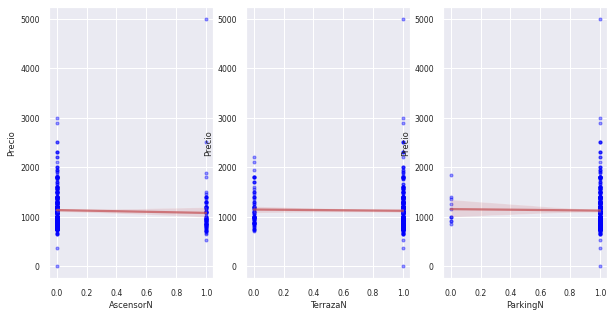

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.regplot(x = 'AscensorN', y='Precio', data = atributos_no_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})
plt.subplot(1,3,2)
sns.regplot(x = 'TerrazaN', y='Precio', data = atributos_no_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})
plt.subplot(1,3,3)
sns.regplot(x = 'ParkingN', y='Precio', data = atributos_no_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})


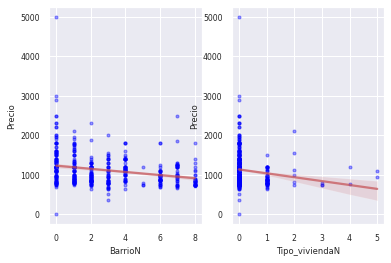

In [27]:
plt.subplot(1,2,1)
sns.regplot(x = 'BarrioN', y='Precio', data = atributos_no_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})
plt.subplot(1,2,2)
sns.regplot(x = 'Tipo_viviendaN', y='Precio', data = atributos_no_numericos, color = "blue", marker = '.', scatter_kws = {"alpha":0.4}, 
            line_kws = {"color":"r","alpha":0.7})

Buscamos la correlación con respecto a la variable objetivo.

In [28]:
# Correlación de las variables
corr = atributos_no_numericos.corr()
corr.sort_values(['Precio'], ascending=False, inplace=True)
corr['Precio']

Precio            1.000000
ParkingN         -0.010740
TerrazaN         -0.024584
AscensorN        -0.056570
Tipo_viviendaN   -0.144238
BarrioN          -0.264302
Name: Precio, dtype: float64

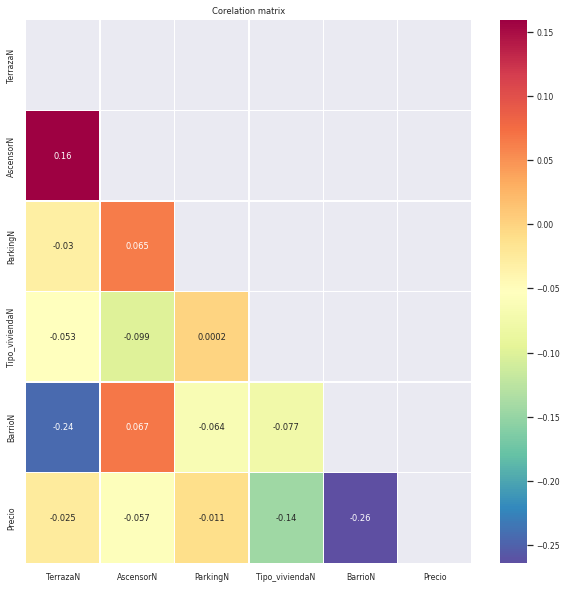

In [29]:
# Obtenemos la correlación por pares de todas las columnas
corr = atributos_no_numericos.corr()
# Configuramos la visualización
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.set(font_scale=0.7)
plt.figure(figsize = (10, 10))
plt.title('Corelation matrix')
sns.heatmap(corr, mask = mask, cmap = 'Spectral_r', linewidths = .5, annot=True)
plt.show()

In [30]:
#Concatenación de todas las características que terminan formando parte del dataset final.
Bilbao_num = pd.concat([atributos_numericos, atributos_no_numericos.BarrioN], axis=1)
Bilbao_num.head()

,Precio,Habitaciones,Banhos,Superficie,Renta,BarrioN
Ciudad,,,,,,
Bilbao,750,2,1,75,18165,8
Bilbao,780,1,1,45,40300,0
Bilbao,1550,4,2,220,40300,0
Bilbao,1200,3,2,87,40401,1
Bilbao,950,1,1,45,40300,0


### Busca de Outliers.


Antes de la representación, para poder representar la superficie convenientemente, vamos a dividirla en rangos.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


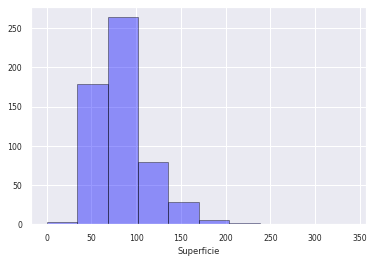

In [31]:
# seaborn histogram
sns.distplot(atributos_numericos['Superficie'], hist=True, kde=False, 
            color = 'blue',bins = 10,
             hist_kws={'edgecolor':'black'})

Text(0, 0.5, 'Flights')

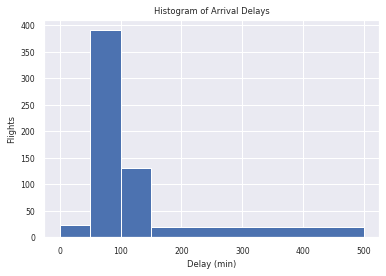

In [32]:
# matplotlib histogram
plt.hist(atributos_numericos['Superficie'],bins =[0,50,100,150,500])

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [33]:
rango_superficie = [0, 50, 100, 250, 500 ]
names = [0, 1, 2, 3]
rango_superficieN = pd.cut(features.loc[:, ('Superficie')], rango_superficie, labels = names)
rango_superficieN

Ciudad
Bilbao    1
Bilbao    0
Bilbao    2
Bilbao    1
Bilbao    0
         ..
Bilbao    2
Bilbao    1
Bilbao    1
Bilbao    1
Bilbao    0
Name: Superficie, Length: 564, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [38]:
rango_superficie = [0, 50, 100, 250, 500 ]
names = [0, 1, 2, 3]
rango_superficieN = pd.cut(features.loc[:, ('Superficie')], rango_superficie, labels = names)
Super_numerica = rango_superficieN

In [39]:
Bilbao_super = pd.concat([atributos_numericos['Precio'], rango_superficieN], axis=1)
Bilbao_super

,Precio,Superficie
Ciudad,,
Bilbao,750,1
Bilbao,780,0
Bilbao,1550,2
Bilbao,1200,1
Bilbao,950,0
...,...,...
Bilbao,1350,2
Bilbao,2000,1
Bilbao,1650,1


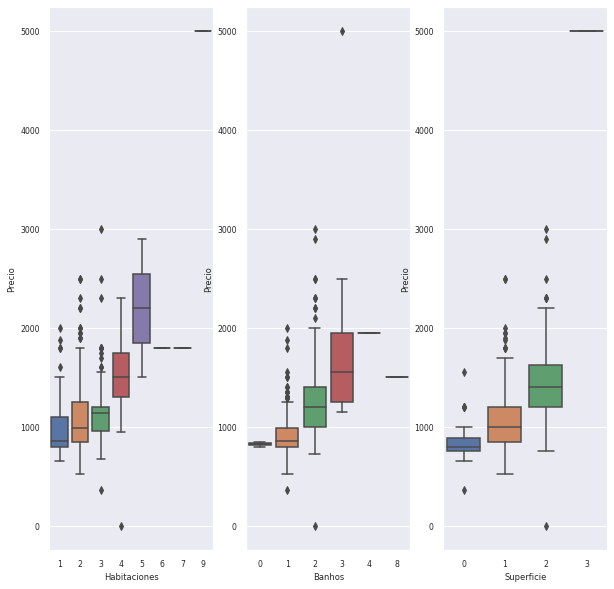

In [41]:
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'Habitaciones', y = 'Precio', data = atributos_numericos)
plt.subplot(1,3,2)
sns.boxplot(x = 'Banhos', y = 'Precio', data = atributos_numericos)
plt.subplot(1,3,3)
sns.boxplot(x = 'Superficie', y = 'Precio', data = Bilbao_super)

Dejaremos en principio los dos valoes extremos, porque aunque lo sean pueden ser posibles.

In [42]:
pisos_bilbao = Bilbao_num[Bilbao_num.Precio > 0]

pisos_bilbao = pisos_bilbao[pisos_bilbao.Superficie > 0]
pisos_bilbao = pisos_bilbao[pisos_bilbao.Banhos > 0]
pisos_bilbao.head(5)

,Precio,Habitaciones,Banhos,Superficie,Renta,BarrioN
Ciudad,,,,,,
Bilbao,750,2,1,75,18165,8
Bilbao,780,1,1,45,40300,0
Bilbao,1550,4,2,220,40300,0
Bilbao,1200,3,2,87,40401,1
Bilbao,950,1,1,45,40300,0


Se descarga el CSV para los demás cuadernos

In [ ]:

output = pd.DataFrame({ 'Habitaciones': pisos_bilbao['Habitaciones'], 'Banhos': pisos_bilbao['Banhos'], 
                       'Superficie': pisos_bilbao['Superficie'],  'Barrio': pisos_bilbao['BarrioN'],
                       'Renta': pisos_bilbao['Renta'], 'Precio': pisos_bilbao['Precio']})

with open('pisos_bilbao.csv', 'w') as f:
  output.to_csv(f,  index = False)
  
files.download('pisos_bilbao.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>